23 65
(23, 17)
(23, 17)
(23, 17)
(23, 17, 3)


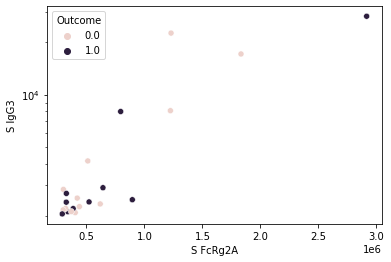

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def tensorView():
    Cov = pd.read_csv('CovData.csv')
    r, c = Cov.shape
    print(r,c)

    SMat = Cov.iloc[:,13:c-1:3]
    RMat = Cov.iloc[:,14:c:3]
    NMat = Cov.iloc[:,15:c:3]

    print(np.shape(SMat))
    print(np.shape(RMat))
    print(np.shape(NMat))

    Tensor = np.dstack((SMat, RMat, NMat))
    print(np.shape(Tensor))

    Plot1 = sns.scatterplot(y="S IgG3", x="S FcRg2A", data=Cov, hue="Outcome")
    Plot1.set(yscale="log")
    return(Tensor)


Tensor = tensorView()


0     1.0
1     1.0
2     1.0
3     0.0
4     0.0
5     0.0
6     0.0
7     1.0
8     1.0
9     0.0
10    0.0
11    1.0
12    1.0
13    0.0
14    0.0
15    1.0
16    0.0
17    1.0
18    0.0
19    1.0
20    0.0
21    0.0
22    NaN
Name: Outcome, dtype: float64
       S IgG1   RBD IgG1     N IgG1    S IgG2  RBD IgG2    N IgG2    S IgG3  \
0    15518.25   11686.50   17408.00   2595.00   2977.50   4418.75   7988.75   
1     2226.50    2343.25    3379.75   2444.75   3850.50   4687.00   2404.00   
2     2279.75    2450.00    3741.00   2117.00   2321.00   3298.50   2110.75   
3   115548.25   93832.00   94973.50   2938.75   2725.00   4380.25  17165.50   
4     2645.00    2479.00    4630.00   2256.75   2408.50   3449.50   2086.00   
5    12611.50    2636.00    4245.00   2264.00   2369.00   3226.50   2203.00   
6     2483.00    2888.50    4732.75   2794.00   4278.00   5668.00   8079.00   
7     2163.50    2421.75    4737.25   2281.50   2924.00   9049.75   2475.25   
8     2136.50    2529.25    3

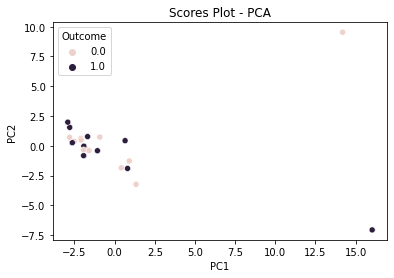

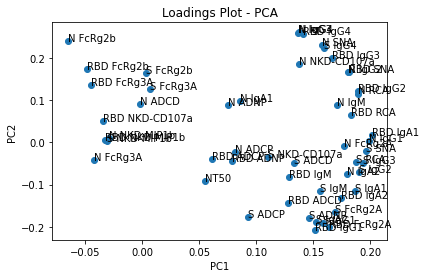

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy import stats
Cov = pd.read_csv('CovData.csv')
Outcome = Cov['Outcome']
print(Outcome)
r, c = Cov.shape
X = Cov.iloc[:,13:c]
print(X)
variables = X.head(0)
X = X.values
PCAdata = scale(X)
pca = PCA(n_components=2)
scores = pca.fit_transform(PCAdata)
print("Variance for each PC: ", pca.explained_variance_ratio_)

sns.scatterplot(y=scores[:,1], x=scores[:,0], data=Cov, hue="Outcome")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scores Plot - PCA")

plt.figure()
loadings = pca.components_.T
plt.scatter(loadings[:,0], loadings[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Loadings Plot - PCA")

for i, txt in enumerate(variables):
    plt.annotate(txt, (loadings[i,0], loadings[i,1]))

